In [ ]:
import numpy as np
perch_length = np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 21.0,
       21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 22.5, 22.7,
       23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 27.3, 27.5, 27.5,
       27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 36.5, 36.0, 37.0, 37.0,
       39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 40.0, 42.0, 43.0, 43.0, 43.5,
       44.0])
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

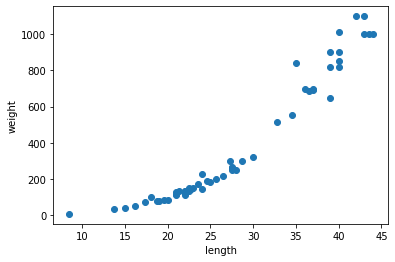

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(perch_length, perch_weight)
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [ ]:
#훈련 세트와 테스트 세트로 나눔
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(perch_length,perch_weight, random_state = 42)

In [ ]:
#numpy의 reshape(): 넘파이 배열의 크기를 바꿔줌
test_array = np.array([1,2,3,4])
print(test_array.shape)
test_array = test_array.reshape(2,2)
print(test_array)

(4,)
[[1 2]
 [3 4]]


In [ ]:
#사이킷런에 사용할 훈련 세트는 2차원 배열이어야 한다.
train_input = train_input.reshape(-1,1) #여기서 -1은 모든 원소를 뜻한다.
test_input  = test_input.reshape(-1,1)
print(train_input.shape, test_input.shape)

(42, 1) (14, 1)


In [ ]:
#k-최근접 이웃 회귀 알고리즘을 이용하여 회귀 모델 훈련
from sklearn.neighbors import KNeighborsRegressor
knr = KNeighborsRegressor()

#k-최근접 이웃 회귀 모델을 훈련
knr.fit(train_input, train_target)

KNeighborsRegressor()

In [ ]:
#테스트 세트의 점수 확인
print(knr.score(test_input,test_target))

0.992809406101064


In [ ]:
# 테스트 세틀 타깃과 예측값의 절댓값 오차의 평균값을 구해봄
from sklearn.metrics import mean_absolute_error

#테스트 세트에 대한 예측을 만듦
test_prediction = knr.predict(test_input)

#테스트 세트에 대한 평균 절댓값 오차를 계산
mae = mean_absolute_error(test_target, test_prediction)
#타깃값과 예측값이 평균적으롤 19g 정도 다른 것을 알 수 있음
print(mae)
print(knr.score(train_input, train_target))

19.157142857142862
0.9698823289099254


In [ ]:
# 훈련 세틀 타깃과 예측값의 절댓값 오차의 평균값을 구해봄\
train_prediction = knr.predict(train_input)
mae = mean_absolute_error(train_target, train_prediction)
print(mae)

35.76190476190476




---







In [ ]:
#위에서 훈련한 모델 knr은 훈련 데이터가 적기도 하고, 이웃의 개수(k)가 많은 탓에 과소적합한
#모델이 됐음 이를 보완하기 위해 k를 default값 5에서 3으로 바꿔서 다시 학습시켜봄
knr.n_neighbors = 3
knr.fit(train_input, train_target)
print(knr.score(train_input, train_target))
#k값을 줄였더니 훈련 세트의 R^2(결정계수)가 높아짐

0.9804899950518966


In [ ]:
#이제 테스트 세트로 결정계수를 확인하여 정상적인 모델이 되었는지 확인해 봄
print(knr.score(test_input, test_target))

0.9746459963987609


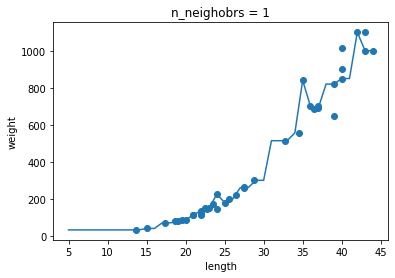

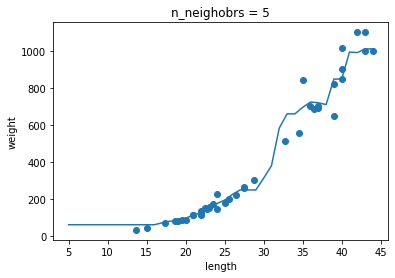

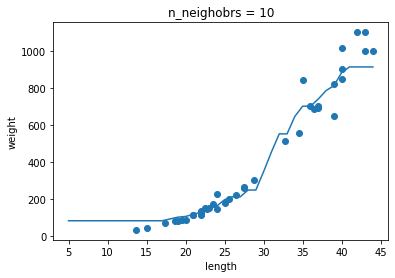

In [ ]:
knr = KNeighborsRegressor()
#5에서 45까지 x 좌표를 만듭니다
x = np.arange(5, 45).reshape(-1,1)

for n in [1, 5, 10]:
  knr.n_neighbors = n
  knr.fit(train_input, train_target)
  #지정한 범위 x에 대한 예측을 구함
  prediction = knr.predict(x)

  plt.scatter(train_input, train_target)
  plt.plot(x, prediction)
  plt.title('n_neighobrs = {}'.format(n))
  plt.xlabel('length')
  plt.ylabel('weight')
  plt.show()